## **TechHorizon**
**Internship Task – TechHorizon**

**Student / Intern: Ameer Hamza**

This notebook demonstrates an MNIST digit classifier built as part of my internship project at TechHorizon.

# **Task 1: Build a Simple Neural Network to Classify Handwritten Digits**
**Goal:** Use a basic neural network to classify digits from images.

This notebook demonstrates an MNIST digit classifier constructed using a straightforward neural network with 3 dense layers.

**Step 1:** Import required libraries

In [ ]:
print("Start")
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

Start


# **Loading and Preparing the MNIST Dataset**

First, we load the MNIST dataset, which contains 70,000 grayscale images of handwritten digits (0–9). The dataset is split into training and testing sets:

In [ ]:
# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show the shapes of the data.
print("Training Images:", x_train.shape)
print("Training Labels:", y_train.shape)

print("Testing Images:", x_test.shape)
print("Test Labels:", y_test.shape)


# 2. Normalize and flatten the image data
x_train = x_train.astype("float32") / 255.0   # scale values between 0 and 1
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Images: (60000, 28, 28)
Training Labels: (60000,)
Testing Images: (10000, 28, 28)
Test Labels: (10000,)



**Show a sample MNIST digit.**

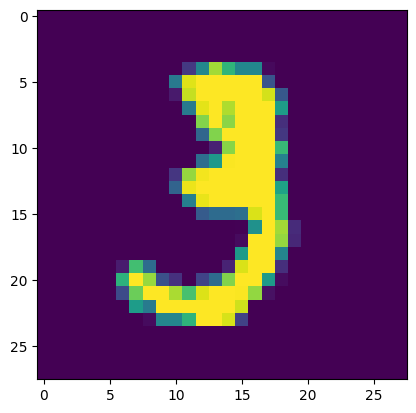

In [ ]:
# Show a sample MNIST digit.
plt.imshow(x_train[10])
plt.show()

# **Building the Neural Network Model**
We then have to define our neural network. Here, we define a sequential model with three Dense layers

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Flatten 28x28 images into 784-dim vector
    Dense(128, activation="relu"),        # Hidden layer 1
    Dense(64, activation="relu"),         # Hidden layer 2
    Dense(10, activation="softmax")       # Output layer (10 classes)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# **Train the Model**
We then train the model on 5 epochs, using a batch size of 128.

In [ ]:
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=5,
                    batch_size=128,
                    verbose=2)

Epoch 1/5
422/422 - 8s - 19ms/step - accuracy: 0.8955 - loss: 0.3623 - val_accuracy: 0.9605 - val_loss: 0.1495
Epoch 2/5
422/422 - 4s - 10ms/step - accuracy: 0.9577 - loss: 0.1443 - val_accuracy: 0.9685 - val_loss: 0.1083
Epoch 3/5
422/422 - 4s - 8ms/step - accuracy: 0.9696 - loss: 0.1002 - val_accuracy: 0.9730 - val_loss: 0.0906
Epoch 4/5
422/422 - 3s - 7ms/step - accuracy: 0.9770 - loss: 0.0756 - val_accuracy: 0.9768 - val_loss: 0.0880
Epoch 5/5
422/422 - 2s - 5ms/step - accuracy: 0.9816 - loss: 0.0598 - val_accuracy: 0.9770 - val_loss: 0.0753


# **Evaluating the Model on Test Data**

After training our neural network, it’s important to assess its performance on unseen data. Here, we evaluate the model on the test dataset to obtain the test loss and test accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTest Accuracy:", test_acc)


Test Accuracy: 0.9763000011444092


# **Making Predictions**

Next, we use the trained model to make predictions on a subset of the test data:

In [ ]:
predictions = model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


# **Analyzing Model Performance with a Confusion Matrix**

To get a detailed view of where the model performs well or makes mistakes, we generate a confusion matrix:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


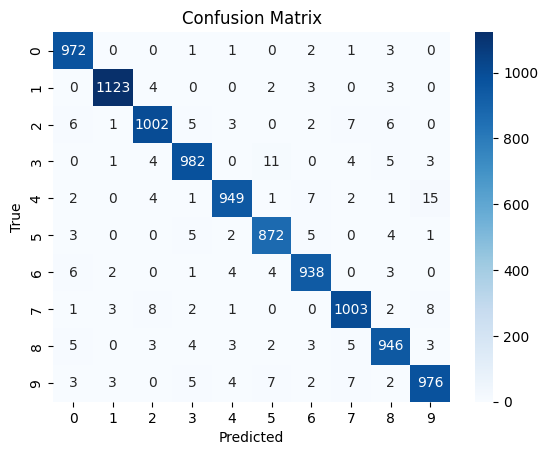

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# **Classification Report**

To gain a detailed understanding of the model’s performance on each digit class, we generate a classification report. This report provides precision, recall, and F1-score for every class.

Precision measures the accuracy of positive predictions for each class.
Recall indicates how well the model identifies all true instances of each class.
F1-score is the harmonic mean of precision and recall, providing a balanced measure of model performance.

*   **Precision** measures the accuracy of positive predictions for each class.
*   **Recall** indicates how well the model identifies all true instances of each class.
*   **F1-score** is the harmonic mean of precision and recall, providing a balanced measure of model performance.



In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# **Visualizing Training Progress and Sample Predictions**

**Training vs Validation Accuracy and Loss**

To understand how well our model is learning, we plot the training and validation accuracy and loss over epochs:

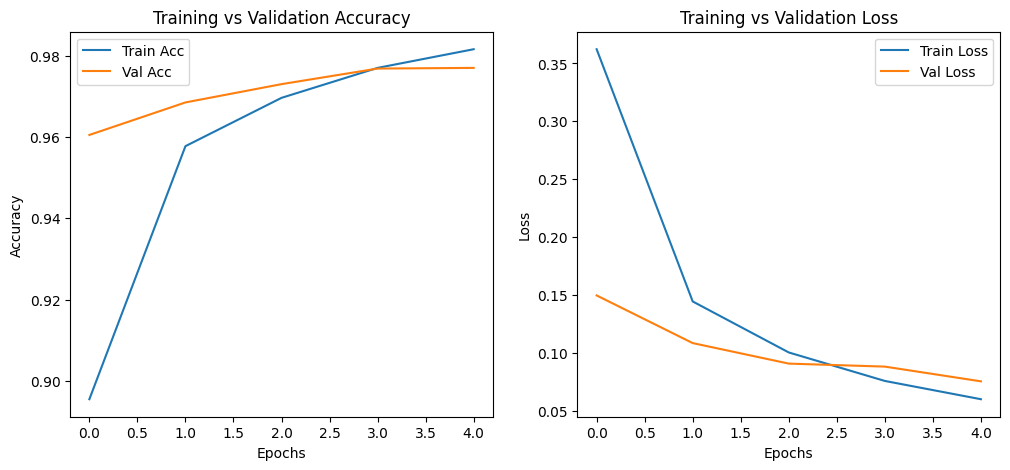

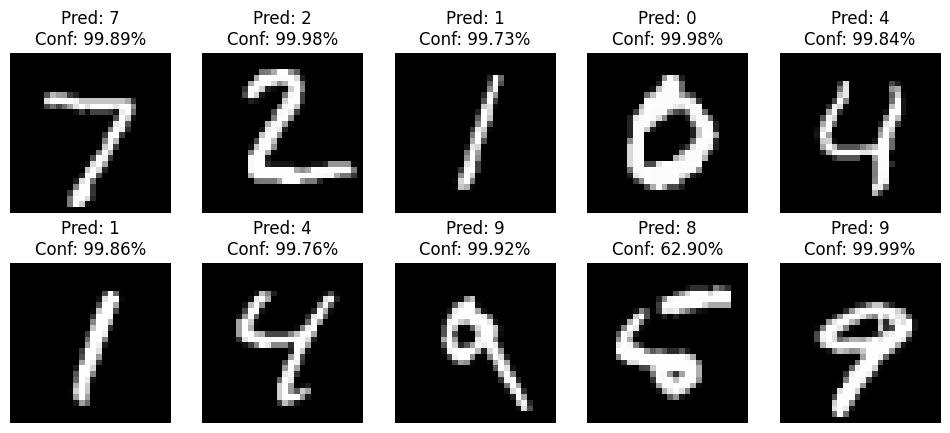

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 4. Show a few correct vs incorrect predictions
# Display predictions with confidence percentage
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap="gray")
    pred_class = np.argmax(predictions[i])
    confidence = np.max(predictions[i]) * 100  # highest probability as %
    plt.title(f"Pred: {pred_class}\nConf: {confidence:.2f}%")
    plt.axis("off")
plt.show()



In [ ]:
model.save('TechHorizonTask1Model.keras')